In [1]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy.linalg as lin_alg

In [33]:
data=pd.read_csv("/mnt/c/Users/buzga/Desktop/School/grad_school/spring_2023/prob_stats_2/homework/homework 1/temperature.csv")
data

,Unnamed: 0,longitude,latitude,1,2,3,4,5,6,7,8,9,10,11,12
0,79669,138.75,-4.75,28.5,28.7,28.5,30.2,29.9,28.8,27.3,28.5,28.4,28.4,29.2,29.0
1,79091,136.75,-14.25,29.4,29.8,29.0,29.7,28.2,26.0,23.9,26.0,26.4,28.3,29.8,30.2
2,22723,-57.75,-19.75,28.8,29.0,28.2,25.5,23.6,22.6,24.7,25.4,26.6,27.7,28.1,28.1
3,40355,22.75,-18.25,25.7,25.6,25.6,24.9,21.3,18.0,17.7,21.0,25.1,28.7,27.7,26.1
4,17837,-71.75,-40.25,10.9,10.0,7.9,5.3,2.8,1.9,-0.2,-0.2,1.4,3.6,6.5,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,46766,37.75,55.75,-13.4,-10.6,-3.8,2.3,9.2,13.8,17.2,17.4,9.2,5.9,-3.8,-6.2
1996,58259,74.75,60.25,-26.3,-19.8,-6.7,-3.1,8.9,15.7,18.8,15.3,7.3,1.4,-11.7,-15.3
1997,7304,-111.25,64.75,-31.5,-33.2,-25.7,-8.9,-2.7,8.8,12.5,9.5,3.5,-7.7,-20.9,-24.1
1998,34790,8.75,36.25,6.2,10.4,9.1,11.5,16.4,21.4,23.5,23.9,22.7,19.0,11.3,7.6


In [51]:
sample_average=lambda data: sum(data)/len(data)
sample_variance=lambda data: sample_average(data**2)-sample_average(data)**2
sample_covariance= lambda a,b:sample_average(a*b)-sample_average(a)*sample_average(b)
sample_corelation_coeficent=lambda a,b: ( sample_covariance(a,b) )/ ( np.sqrt(sample_variance(a)*sample_variance(b)) )
standardize=lambda data: (data-sample_average(data))/np.sqrt(sample_variance(data))
mmse_estimator= lambda x,b,a:( np.sqrt( sample_variance(b) ) )*( sample_corelation_coeficent(a,b) ) * ( (x-sample_average(a))/np.sqrt(sample_variance(a)) )+sample_average(b)

[[ 1.         -0.88082438]
 [-0.88082438  1.        ]]
[[ 1.        -0.0908111]
 [-0.0908111  1.       ]]
the coeficent of corelaetion between january temperture and latidude is -0.880824383893164
the coeficent of corelaetion between jully temperture and latidude is -0.09081110315246894


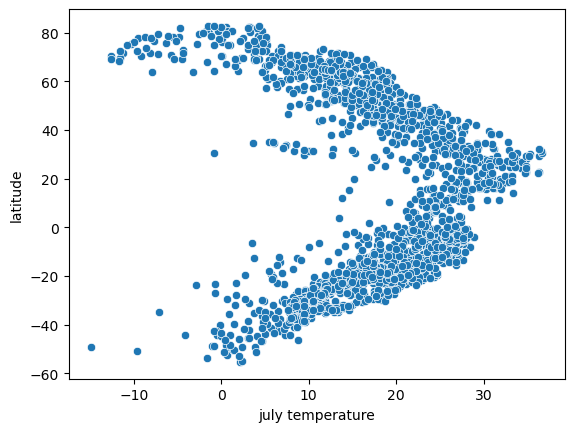

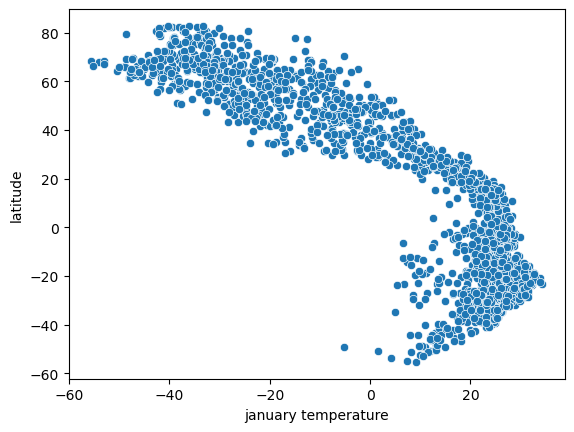

In [35]:
print(np.corrcoef(data["1"],data["latitude"]))
print(np.corrcoef(data["7"],data["latitude"]))
jan_coef=sample_corelation_coeficent(data["1"],data["latitude"]) 
jul_coef=sample_corelation_coeficent(data["7"],data["latitude"]) 
print("the coeficent of corelaetion between january temperture and latidude is {0}".format(jan_coef))
print("the coeficent of corelaetion between jully temperture and latidude is {0}".format(jul_coef))
ax= sb.scatterplot(data=data, y="latitude",x=str(7))
ax.set(xlabel='july temperature')
plt.show()
bx=sb.scatterplot(data=data, y="latitude",x=str(1))
bx.set(xlabel='january temperature')
plt.show()

- there is a strongly negative linear relationship between latidude and temperature in january, and a much weaker negative realtionship between temperature and laditude in july. 


the coeficent of corelaetion between jully temperture and latidude is 0.8539573093433449
[[1.         0.85395731]
 [0.85395731 1.        ]]


/tmp/ipykernel_205/3818584718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern["latitude"]=standardize(southern["latitude"])
/tmp/ipykernel_205/3818584718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern["7"]=standardize(southern["7"])


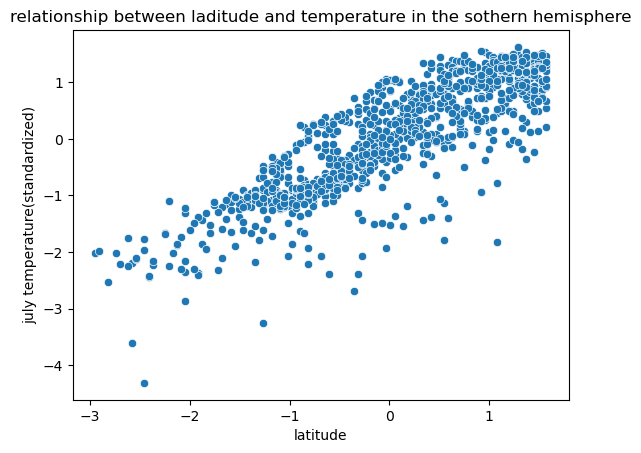

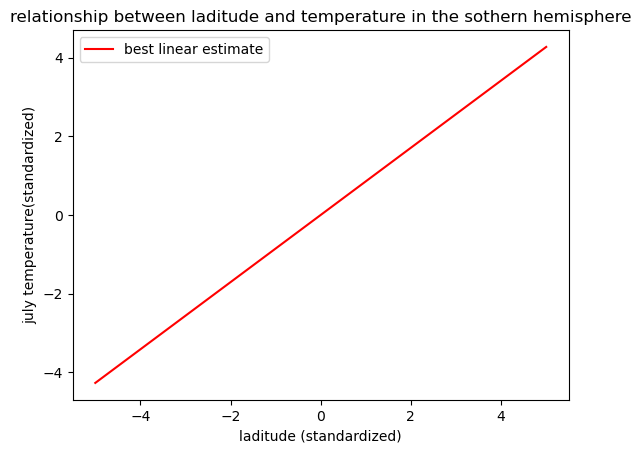

[Text(0.5, 0, 'laditude (standardized)'),
 Text(0, 0.5, 'july temperature(standardized)'),
 Text(0.5, 1.0, 'risiduals between laditude and temperature in the sothern hemisphere')]

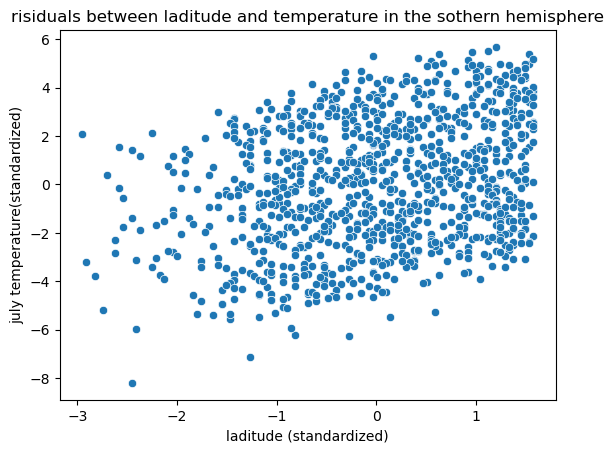

In [58]:
southern=data[data["latitude"]<0]
southern["latitude"]=standardize(southern["latitude"])
southern["7"]=standardize(southern["7"])
jul_coef=sample_corelation_coeficent(southern["7"],southern["latitude"]) 
print("the coeficent of corelaetion between jully temperture and latidude is {0}".format(jul_coef))
print(np.corrcoef(southern["7"],southern["latitude"]))
x_range=np.linspace(-5,5,1000)
ax= sb.scatterplot(data=southern, x="latitude",y=str(7))
ax.set(ylabel='july temperature(standardized)', title="relationship between laditude and temperature in the sothern hemisphere")
plt.show()
line=mmse_estimator(x_range,southern["7"],southern["latitude"])
bx=sb.lineplot(x=x_range, y=line, color="red", label="best linear estimate")
bx.set(xlabel="laditude (standardized)", ylabel='july temperature(standardized)', title="relationship between laditude and temperature in the sothern hemisphere")
plt.show()
cx= sb.scatterplot( x=southern["latitude"],y=residual)
cx.set(xlabel="laditude (standardized)", ylabel='july temperature(standardized)', title="risiduals between laditude and temperature in the sothern hemisphere")





the coeficent of corelaetion between january temperture and latidude is -0.9044282825621119
[[ 1.         -0.90442828]
 [-0.90442828  1.        ]]


/tmp/ipykernel_205/3214691658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nothern["latitude"]=standardize(nothern["latitude"])
/tmp/ipykernel_205/3214691658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nothern["7"]=standardize(nothern["1"])


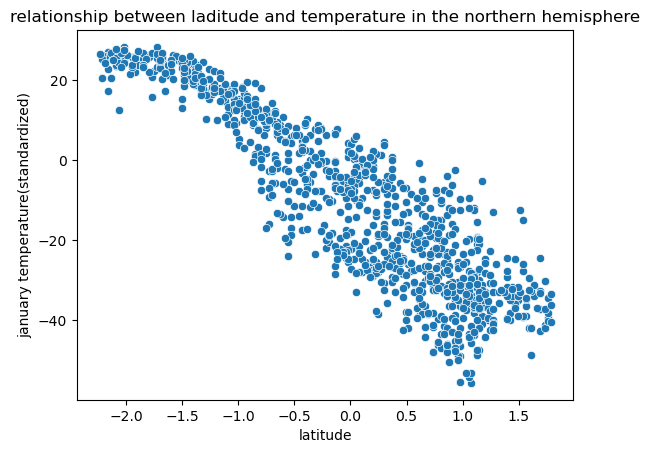

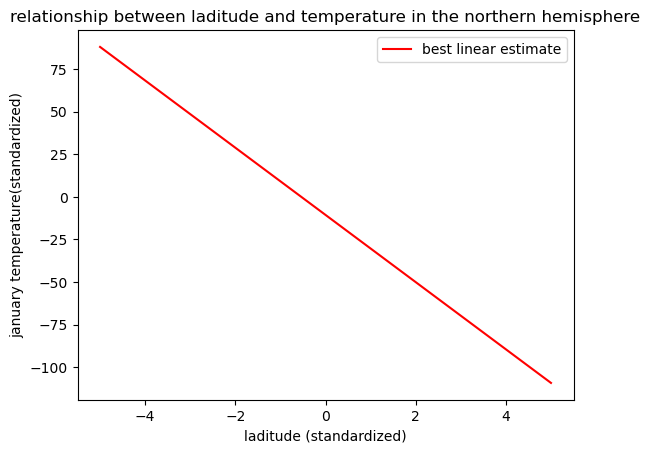

1000 1000


[Text(0.5, 0, 'laditude (standardized)'),
 Text(0, 0.5, 'january temperature(standardized)'),
 Text(0.5, 1.0, 'risiduals between laditude and temperature in the northern hemisphere')]

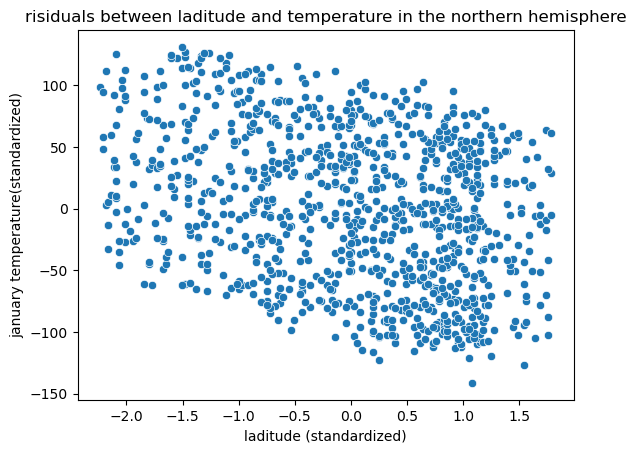

In [59]:
nothern=data[data["latitude"]>0]
nothern["latitude"]=standardize(nothern["latitude"])
nothern["7"]=standardize(nothern["1"])
jul_coef=sample_corelation_coeficent(nothern["1"],nothern["latitude"]) 
print("the coeficent of corelaetion between january temperture and latidude is {0}".format(jul_coef))
print(np.corrcoef(nothern["1"],nothern["latitude"]))
x_range=np.linspace(-5,5,1000)
ax= sb.scatterplot(data=nothern, x="latitude",y=str(1))
ax.set(ylabel='january temperature(standardized)', title="relationship between laditude and temperature in the northern hemisphere")
plt.show()
line=mmse_estimator(x_range,nothern["1"],nothern["latitude"])
bx=sb.lineplot(x=x_range, y=line, color="red", label="best linear estimate")
bx.set(xlabel="laditude (standardized)", ylabel='january temperature(standardized)', title="relationship between laditude and temperature in the northern hemisphere")
plt.show()
print(len(nothern["1"]), len(line))
residual=nothern["1"]-line
cx= sb.scatterplot( x=nothern["latitude"],y=residual)
cx.set(xlabel="laditude (standardized)", ylabel='january temperature(standardized)', title="risiduals between laditude and temperature in the northern hemisphere")


In [2]:
Sigma=[ [1,.5,.5], [.5,1,-.25], [.5,-.25,1]]
mu=[0,0,0]
lin_alg.eig(Sigma)
lin_alg.inv(Sigma)
lin_alg.matrix_rank(Sigma)
np.random.multivariate_normal(mu, Sigma, 5000)

array([[ 2.19832388e+00,  4.48905402e-01,  1.34669018e+00],
       [ 2.72874758e-01, -1.52858084e-04,  1.11601234e+00],
       [ 1.14056475e+00, -1.53527805e-01,  7.85718977e-01],
       ...,
       [ 8.54974843e-01,  1.40817632e-01,  1.48240625e+00],
       [ 1.76564897e+00, -7.08227802e-01,  1.34085115e+00],
       [ 4.25432881e-02,  2.00343351e-01,  5.31569273e-02]])

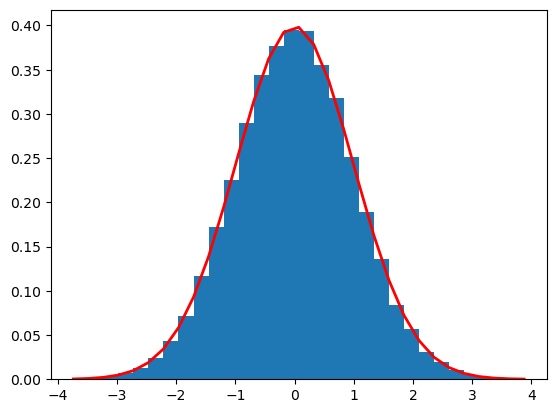

array([[ 1.        , -0.00359421],
       [-0.00359421,  1.        ]])

In [39]:
mu, sigma = 0, 1 # mean and standard deviation
num=50000
a = np.random.normal(mu, sigma, num)
test_x=np.linspace(-5,5,num)
count, bins, ignored = plt.hist(a, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
w=np.random.choice([-1,1], size=num)
y=a*w
plt.show()
np.corrcoef(y,a)


In [5]:
np.random.randint(0,3,1)

array([1])